MNIST Handwriting Recogniton CNN Practice
===
Kenny Hsieh, 2018/3/15

## Import Libraries

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils # One Hot Encoding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

## Load & Preprocess the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
# Reshape
X_train4d = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test4d = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print('Train images : ', X_train4d.shape)
print('Test images : ', X_test4d.shape)

# Normalize
X_train4d_norm = X_train4d / 255
X_test4d_norm = X_test4d / 255

Train images :  (60000, 28, 28, 1)
Test images :  (10000, 28, 28, 1)


In [0]:
# One Hot Encoding
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

## Construct the Convolution Neural Network (CNN)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# CNN
model = Sequential()
model.add(Conv2D(filters = 16,
                kernel_size = (5,5),
                padding = 'same',
                input_shape = (28, 28, 1),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 36,
                kernel_size = (5,5),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# Fully Connected Networks
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## Training the CNN

In [6]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

train_history = model.fit(x = X_train4d_norm,
                         y = y_train_OneHot,
                         validation_split = 0.2,
                         epochs = 10,
                         batch_size = 300,
                         verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.4904 - acc: 0.8467 - val_loss: 0.0955 - val_acc: 0.9728
Epoch 2/10
 - 3s - loss: 0.1398 - acc: 0.9587 - val_loss: 0.0636 - val_acc: 0.9802
Epoch 3/10
 - 3s - loss: 0.1016 - acc: 0.9696 - val_loss: 0.0504 - val_acc: 0.9842
Epoch 4/10
 - 3s - loss: 0.0826 - acc: 0.9761 - val_loss: 0.0466 - val_acc: 0.9863
Epoch 5/10
 - 3s - loss: 0.0719 - acc: 0.9776 - val_loss: 0.0396 - val_acc: 0.9880
Epoch 6/10
 - 3s - loss: 0.0637 - acc: 0.9814 - val_loss: 0.0389 - val_acc: 0.9884
Epoch 7/10
 - 3s - loss: 0.0564 - acc: 0.9824 - val_loss: 0.0436 - val_acc: 0.9869
Epoch 8/10
 - 3s - loss: 0.0509 - acc: 0.9839 - val_loss: 0.0339 - val_acc: 0.9898
Epoch 9/10
 - 3s - loss: 0.0447 - acc: 0.9864 - val_loss: 0.0335 - val_acc: 0.9903
Epoch 10/10
 - 3s - loss: 0.0423 - acc: 0.9874 - val_loss: 0.0345 - val_acc: 0.9896


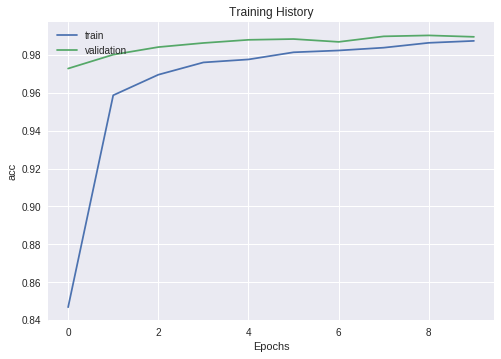

In [9]:
# Useful Fuction : observe the training history
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Training History')
  plt.ylabel(train)
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = 'upper left')
  plt.show()

show_train_history(train_history, 'acc', 'val_acc')

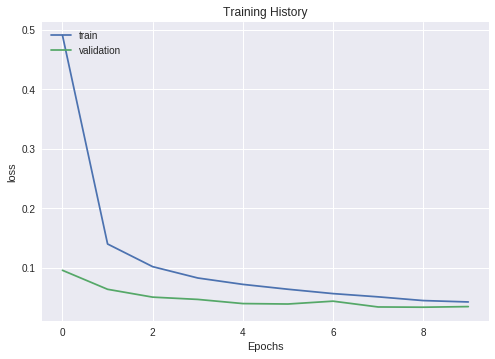

In [10]:
show_train_history(train_history, 'loss', 'val_loss')

## Testing the Model Performance

In [12]:
scores = model.evaluate(X_test4d_norm, y_test_OneHot)
print(scores[1])

10000/10000 [==============================] - 1s 89us/step
0.9911


## Predict with Model

In [14]:
prediction = model.predict_classes(X_test4d_norm)
print(prediction[:10])

[7 2 1 0 4 1 4 9 5 9]


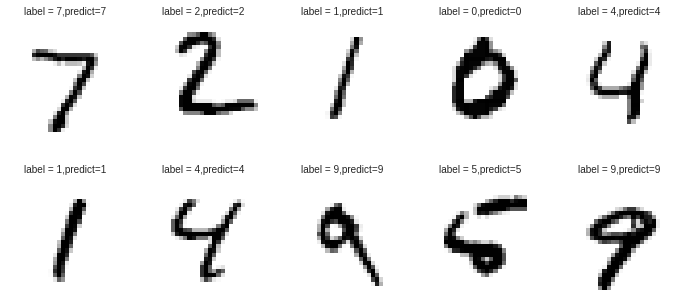

In [15]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  
  #Plot at most 25 figure
  if num > 25 : num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap = 'binary')
    title = "label = " + str(labels[idx])
    if len(prediction) > 0:
      title += ',predict=' + str(prediction[idx])
     
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([]); ax.set_yticks([])
    idx += 1
  plt.show()

plot_images_labels_prediction(X_test, y_test, prediction, 0, 10)

## Confusion Matrix

In [18]:
pd.crosstab(y_test, prediction,
           rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1133,1,0,0,1,0,0,0,0
2,2,1,1026,0,1,0,0,2,0,0
3,0,0,1,999,0,5,0,3,2,0
4,0,0,0,0,978,0,0,0,1,3
5,1,0,0,3,0,886,2,0,0,0
6,4,2,0,0,2,1,949,0,0,0
7,0,2,3,0,0,0,0,1020,1,2
8,3,1,3,2,1,2,0,2,957,3
